In [1]:
%load_ext Cython
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cma
sns.set(rc={"figure.figsize": (6, 6)})
sns.set_palette('colorblind')

In [2]:
%%cython
cimport cython
cimport numpy as np
import numpy as np

@cython.boundscheck(False)
@cython.wraparound(False)
def list_of_sequence_size(np.ndarray a):
    cdef int start = -1
    cdef int i
    out = []
    for i in range(len(a)):
        if start == -1 and a[i] == 1:
            start = i
        if start != -1 and a[i] == 0:
            out.append(i - start)
            start = -1
    if start != -1:
        out.append(len(a) - start)
    return out

def sequence_size(a):
    return list_of_sequence_size(a.values)

def sequence_size_mean(a):
    elems = sequence_size(a)
    if elems:
        return np.mean(elems)
    else:
        return np.NaN

In [3]:
fit = pd.read_csv("/data/logs/partner_choice_lot_values/fitnesslog.txt", delimiter="\t")
fit

,gen,pop,minfit,q1fit,medfit,q3fit,maxfit,meanfit,varfit
0,0,50,-945.243000,0.00000,20.6510,289.376,1289.70,183.098,138644.0
1,1,50,-625.549000,0.00000,142.2610,351.765,1706.38,246.907,187926.0
2,2,50,-554.188000,1.00187,142.5850,578.410,3003.48,462.009,502398.0
3,3,50,-527.532000,0.00000,22.3736,263.198,2032.34,192.016,164837.0
4,4,50,-216.706000,4.39704,63.3340,266.569,2129.74,245.097,174154.0
5,5,50,-76.533000,5.58884,112.1890,456.671,1810.73,310.594,203822.0
6,6,50,-0.321255,189.88400,554.5000,895.024,2353.53,652.326,319879.0
7,7,50,-563.126000,98.62200,528.8990,1112.960,2790.70,689.332,541245.0
8,8,50,-83.066500,312.38300,658.4030,1194.300,3073.87,836.685,517199.0
9,9,50,-85.371400,160.50600,780.1040,1238.530,2195.49,786.464,409451.0


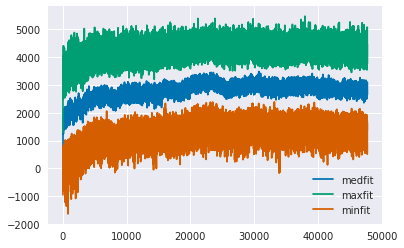

In [4]:
fit[['medfit', 'maxfit', 'minfit']].plot()

In [5]:
data = pd.read_csv("/data/logs/partner_choice_lot_values/analysis_log.txt", delimiter="\t")

In [6]:
data['trueInv'] = np.where(data['onOpp'] == 1, data['ownInv'], np.nan)
groupdata = data.groupby(('ind', 'coop'), as_index=False).mean()

(0, 1)

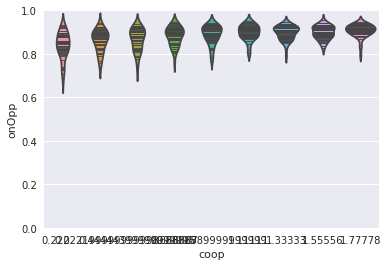

In [7]:
sns.violinplot(x='coop', y='onOpp', data=groupdata, inner='sticks')
plt.ylim(0, 1)

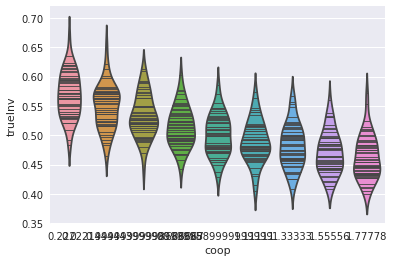

In [8]:
sns.violinplot(x='coop', y='trueInv', data=groupdata, inner='sticks')